<a href="https://colab.research.google.com/github/Ashok401/AIML_BootCamp/blob/main/Capstone_iPhone_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
#Data set : https://www.kaggle.com/datasets/mrmars1010/iphone-customer-reviews-nlp

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/iphone.csv')
#pd.set_option('display.max_colwidth', None)

#AI: Ashok :reviewTitle & reviewDescription put together.
# All of these are iPhone 13 or something diff? Hint : variantAsin, check the kaggle site.
# Cross table, Piviot table.
# Rating Vs Review description - Is there parity ? Or No rating, can we get it from decription.

# AI : Yujin :
#Review chapter 19 (ScikitLearn) & 27 (NLP) and share your suggestions or provide more useful docs.

# --> df['reviewDescription'].describe()
#How can I get more insights ? And can you review "reviewDescription" enough to use ScikitLearn & NLP ?

# --> df[df['reviewDescription'].str.contains('not happy', na = False)]['reviewDescription']
#How can I get the full text here? Ashok : I fixed it, no action needed for this case.



In [119]:
df.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's nothing compared to it's speed and ios but i was disappointed because there's no charger for it even though Indian judiciary told them to provide , still they haven't made any progress regarding charger. Why should we spend 62k and more than that for iPhones because of it's brand and Acessories comfort size and Features right if that's not there what's point of buying an iPhone.Thank you🙏",https://www.amazon.in/gp/customer-reviews/R345SEIPU4N2XD/ref=cm_cr_getr_d_rvw_ttl?ie=UTF8&ASIN=B09G9BQS98,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switched to apple, performance wise iPhone is more better than android due to A15 Bionic chip. I feel pleasant while using iPhone in hand. I like it very much 😍❤️",https://www.amazon.in/gp/customer-reviews/R2HJRJW7MRIVNL/ref=cm_cr_getr_d_rvw_ttl?ie=UTF8&ASIN=B09G9BQS98,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,"I tried to flip camera while recording but no facility is added here. You have to pause first then you can flip from back to front or vice versa it means you can't continue it, very awkward position. Iphone software should be upgraded so that we can make it go. It's very essential for a content creator. I purchased gimbal dji om se but it could not provided that, it's very essential for a vlogger but I was fed up after finding the basic requirements wasn't built in these products !",https://www.amazon.in/gp/customer-reviews/R3Y7TPOGMY40P/ref=cm_cr_getr_d_rvw_ttl?ie=UTF8&ASIN=B09G9BQS98,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9A1G2E3ZB7L/ref=cm_cr_getr_d_rvw_ttl?ie=UTF8&ASIN=B09G9BQS98,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI5GCQ8WH1LV/ref=cm_cr_getr_d_rvw_ttl?ie=UTF8&ASIN=B09G9BQS98,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


In [120]:
df.shape

(3062, 11)

In [121]:
df.dropna(axis=0, inplace=True)

In [122]:
df.shape

(2960, 11)

In [123]:
df[df['ratingScore'] == 5].value_counts().sum()

np.int64(1539)

In [124]:
df = df[df['isVerified']]

In [125]:
df['variant'].describe()
#Most popular model from the set: Colour: BlueSize: 128 GB

,variant
count,2761
unique,83
top,Colour: BlueSize: 128 GB
freq,284


In [126]:
df['reviewDescription'].describe()
#AI : Yujin : How can I get more insights ?


,reviewDescription
count,2761
unique,2115
top,Good
freq,32


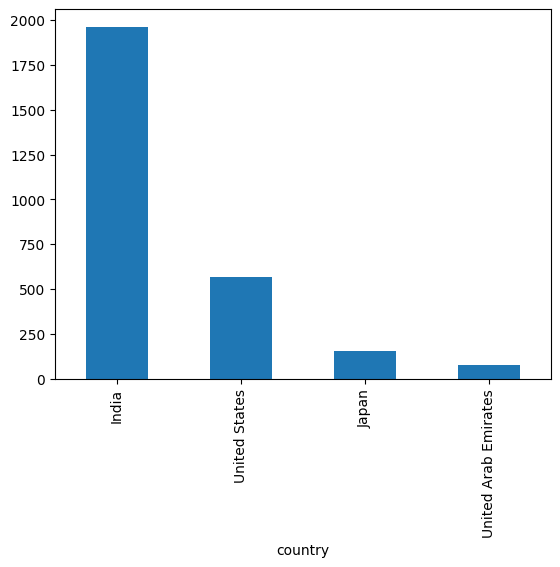

In [127]:
df['country'].value_counts().plot(kind='bar')
plt.show()

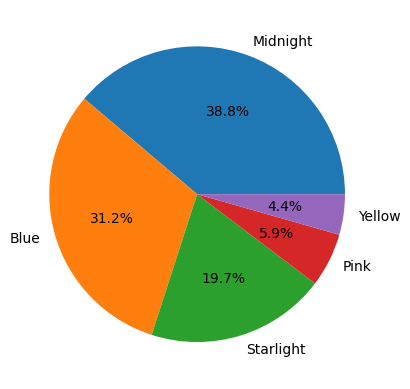

In [128]:
MidnightSize = df['variant'].str.contains('Color: MidnightSize', na = False).sum()
Blue = df['variant'].str.contains('Color: Blue', na = False).sum()
Starlight = df['variant'].str.contains('Color: Starlight', na = False).sum()
Pink = df['variant'].str.contains('Color: Pink', na = False).sum()
Yellow = df['variant'].str.contains('Color: Yellow', na = False).sum()

plt.pie([MidnightSize, Blue, Starlight, Pink, Yellow], labels=['Midnight', 'Blue', 'Starlight', 'Pink','Yellow'], autopct='%1.1f%%')
plt.show()

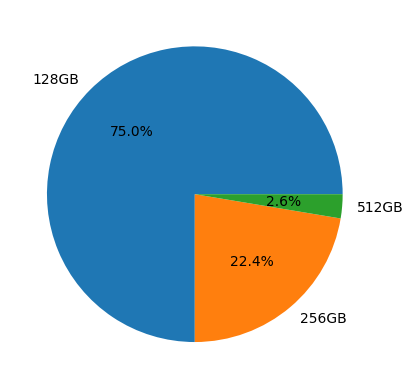

In [129]:
Size_128 = df['variant'].str.contains('Size: 128GB', na = False).sum()
Size_256 = df['variant'].str.contains('Size: 256GB', na = False).sum()
Size_512 = df['variant'].str.contains('Size: 512GB', na = False).sum()
plt.pie([Size_128, Size_256, Size_512], labels=['128GB', '256GB', '512GB'], autopct='%1.1f%%')
plt.show()


In [130]:
matched = df[df['reviewDescription'].str.contains('not happy', na = False)]['reviewDescription']
matched.str.lstrip()
#AI : Yujin : How can I get full text here? Ashok : I fixed it.


,reviewDescription
1158,I recently purchased I phone 14 and I'm not happy with this product. If anyone wants to buy I phone 14 so thus I will sell it..
1641,"Happy with the phone, but not happy with the scratch’s it came with on the camera .I bought this as excellent condition, expected better for the money"
1681,"I bought it in good condition. I paid $450 but many scratches on the screen (small scratches), camera lenses also edge of the iPhone damage. I'm gonna return it. I'm not happy with this purchase."
3058,"iam not happy with this product why because charger not provided by apple, this is extra burden to customers, without charger adapter how we can charge, by default adapter should give"


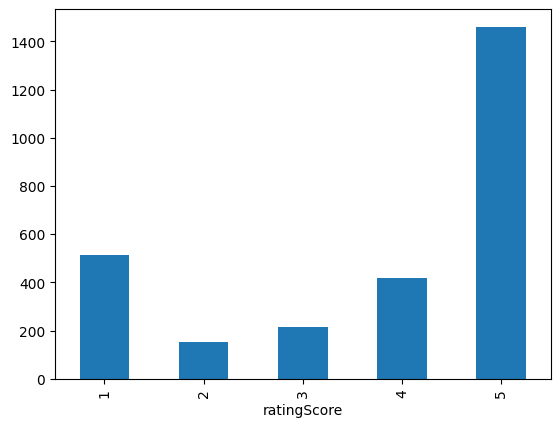

In [131]:
df['ratingScore'].value_counts().reindex([1, 2, 3, 4, 5]).plot(kind='bar')
plt.show()

plt.show() # Go with order (1, 2, ... 5) # Ashok : Fixed.

In [132]:
df[df['ratingScore'] == 5]['variant'].describe()

,variant
count,1460
unique,69
top,Colour: BlueSize: 128 GB
freq,113


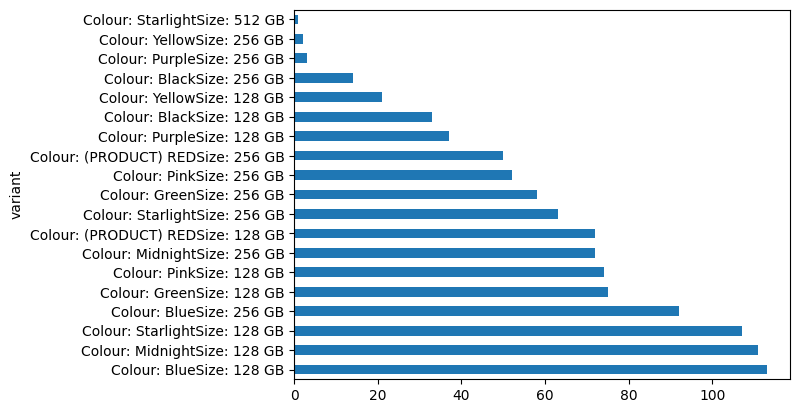

In [133]:
filtered = df[(df['ratingScore'] == 5) & (df['country']=='India')]
filtered['variant'].value_counts().plot(kind='barh')
plt.show() #Horizantal bar-chart (Fixed), do more work, use heat map (work in progress)

<function matplotlib.pyplot.show(close=None, block=None)>

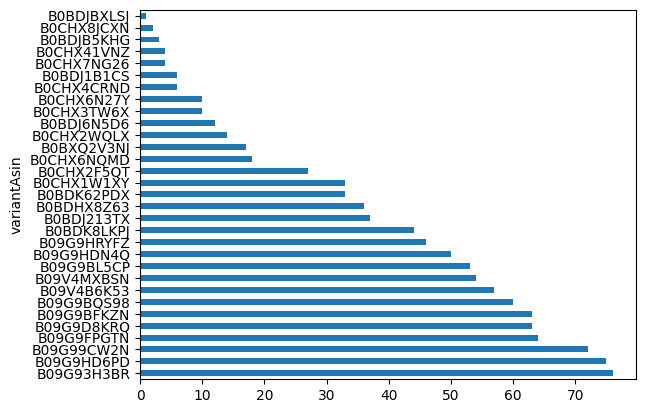

In [134]:
filtered['variantAsin'].value_counts().plot(kind='barh')
plt.show #Horizontal (fixed), check why mapping is diff wrt above(work in progress).